<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Hierarchical Clustering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to Hierarchical clustering
*   Create dendograms to visualize the clustering


# Clusrtering on `make_blobs` dataset

We will be looking at a clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br> <b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>


## Import necessary modules

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline


<h2 id="generating_data">Generating Random Data</h2>
We will be generating a set of data using the <b>make_blobs</b> class. <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X1</b> and <b>y1</b>.

### `make_blobs()`

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

In [3]:
X1[0:5] # list of cordinates

array([[ 9.41182551,  3.94317049],
       [-2.23390402,  0.33854719],
       [ 0.58129811,  0.95877578],
       [ 8.53018605,  5.5843016 ],
       [ 0.57997029,  0.84706323]])

In [4]:
y1 # list of labels correspond to eeach coordinate 

array([3, 1, 2, 3, 2, 0, 0, 1, 1, 3, 1, 2, 2, 1, 3, 0, 1, 1, 1, 3, 3, 1,
       0, 0, 2, 2, 0, 0, 3, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 1, 2, 3, 2, 0,
       1, 2, 3, 0, 2, 0])

### `make_blobs()` data distribution

Check distribution of data.


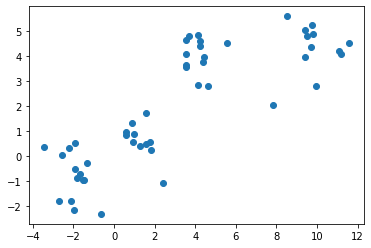

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 
plt.show()

### `make_blobs` returned clusters distribution

clustering based on existing data

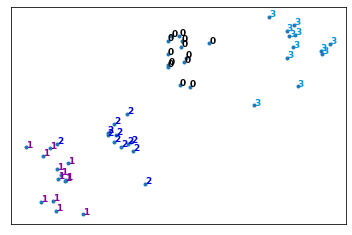

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.
# 1. Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
# 2. Get the average distance for X1. (normalization)
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.(50 samples)
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(y1[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

## Dendrogram with distance matrix

### `distance_matrix()`
Remember that a <b>distance matrix</b> contains the <b> distance from each point to every other point of a dataset </b>.

Use the function <b> distance_matrix, </b> which requires <b>two inputs</b>. Use the Feature Matrix, <b> X1 </b> as both inputs and save the distance matrix to a variable called <b> dist_matrix </b> <br> <br>
Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. <br> (print out dist_matrix to make sure it's correct)


In [7]:
blobs_dist_matrix = distance_matrix(X1,X1) 
print(blobs_dist_matrix)

[[0.         0.90131402 0.70011114 ... 0.394655   0.68335071 0.35156294]
 [0.90131402 0.         0.20359866 ... 0.56242473 0.22559607 0.66970051]
 [0.70011114 0.20359866 0.         ... 0.38559259 0.02941608 0.49772108]
 ...
 [0.394655   0.56242473 0.38559259 ... 0.         0.38199234 0.11284457]
 [0.68335071 0.22559607 0.02941608 ... 0.38199234 0.         0.49471898]
 [0.35156294 0.66970051 0.49772108 ... 0.11284457 0.49471898 0.        ]]


In [8]:
blobs_dist_matrix.shape

(50, 50)

Original tutorial did not transform matrix via `squareform`. Convert square distance matrix to condensd (`linkage` only takes condensed matrix)

In [9]:
blobs_dist_matrix = squareform(blobs_dist_matrix)
blobs_dist_matrix

array([0.90131402, 0.70011114, 0.21619224, ..., 0.38199234, 0.11284457,
       0.49471898])

In [10]:
blobs_dist_matrix.shape

(1225,)

### Dendrogram with `complete` Hierarchy linkage

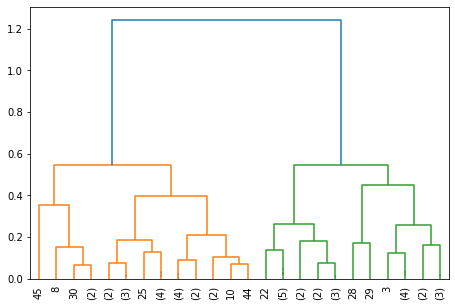

In [11]:
figure = plt.figure(figsize=(7.5, 5))
blobs_Z_dist_matrix= hierarchy.linkage(blobs_dist_matrix, 'complete') 
blobs_dendro_dist_matrix = hierarchy.dendrogram(blobs_Z_dist_matrix,
                                                truncate_mode='lastp', #condense to the last p merged clusters
                                                p=24, # set how many last p merged clusters to show
                                                show_contracted=True, # to make truncate nicer 
                                                leaf_rotation=90.) 

### Dendrogram with `average` Hierarchy linkage

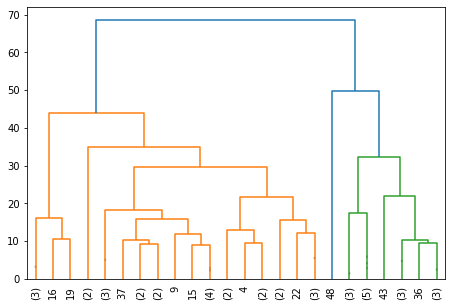

In [12]:
figure = plt.figure(figsize=(7.5, 5))
blobs_Z_dist_matrix2 = hierarchy.linkage(blobs_Z_dist_matrix, 'average')
blobs_dendro_dist_matrix2 = hierarchy.dendrogram(blobs_Z_dist_matrix2,
                                                 truncate_mode='lastp', #condense to the last p merged clusters
                                                 p=24, # set how many last p merged clusters to show
                                                 show_contracted=True, # to make truncate nicer 
                                                 leaf_rotation=90.)


<h2 id="agglomerative_clustering">Agglomerative Clustering</h2>

We will start by clustering the random data points we just created.


The <b> Agglomerative Clustering </b> class will require two inputs:

<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>.


### Build and fit model

In [13]:
blobs_agglom =  AgglomerativeClustering(n_clusters=4, linkage='average', compute_distances=True) #complete tree
blobs_agglom.fit(X1)

AgglomerativeClustering(compute_distances=True, linkage='average', n_clusters=4)

In [14]:
blobs_agglom.labels_

array([0, 3, 1, 0, 1, 2, 2, 3, 3, 0, 3, 1, 3, 3, 0, 2, 3, 3, 3, 0, 0, 3,
       2, 2, 1, 1, 2, 2, 0, 0, 3, 3, 1, 0, 0, 2, 2, 2, 1, 3, 1, 0, 1, 2,
       3, 1, 0, 2, 1, 2], dtype=int64)

In [15]:
dist = blobs_agglom.distances_ 
print("max distance difference:", dist.max())
print("min distance difference:", dist.min())

max distance difference: 0.7574349464513532
min distance difference: 0.005024693037824562


### Agglomerative Clustering Model distribution

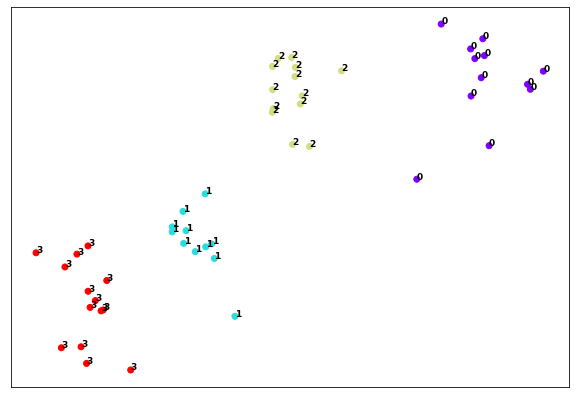

In [16]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,7))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.
# 1. Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
# 2. Get the average distance for X1. (normalization)
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.(50 samples)
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(blobs_agglom.labels_[i]),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

plt.scatter(X1[:, 0], X1[:, 1],c=blobs_agglom.labels_, cmap='rainbow')
# Display the plot
plt.show()